<a href="https://colab.research.google.com/github/NataliaOlarte/Ciencia_de_datos/blob/main/ProyectoLol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Proyecto Fundamentos de Ciencia de Datos**

En el siguiente cuaderno se explora la informacion de un jugador del equipo de League of Legends de la Unab con el fin de dar consejos para mejorar su rendimiento. El jugador asume el carril de Toplane donde expresa su campeon mas usado (main) es Wu-Kong. A travez de este colab se muestra todo el proceso desde la descarga de sus datos hasta las conclusiones.

##**1. Importe de datos**


Se usa la Api_Key de Riot Games para obtener el puuid del jugador.

In [ ]:
import requests

API_KEY = "RGAPI-0166b9a5-e7f7-4259-9a70-e80a8828c681"
NOMBRE_INVOCADOR = "Veroluna32"
TAGLINE = "LAN"

# URL para obtener el puuid del jugador
url = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{NOMBRE_INVOCADOR}/{TAGLINE}"

headers = {"X-Riot-Token": API_KEY}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    print("PUUID:", data["puuid"])
else:
    print("Error:", response.status_code, response.text)


Error: 400 {"status":{"message":"Unknown apikey","status_code":400}}


Con el puuid del jugador y la llave Api_Key pedimos las ultimas 100 partidas que tiene el jugador y nos entrega el id de cda partida en una lista.

In [ ]:
import requests

API_KEY = "RGAPI-0166b9a5-e7f7-4259-9a70-e80a8828c681"
PUUID = "EAJvQIRtpInZfjRxlpNw6d-twJ__sPyC9YIskQubBZZefS5gW1uxX_wZ2KJwGkKi-BiSKNi85O9oNA"
REGION = "americas"

# URL para obtener el historial de partidas
url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/by-puuid/{PUUID}/ids?start=0&count=100"

headers = {"X-Riot-Token": API_KEY}
response = requests.get(url, headers=headers)

if response.status_code == 200:
    match_ids = response.json()
    print("Últimos 100 partidos:", match_ids)
else:
    print("Error:", response.status_code, response.text)


Error: 400 {"status":{"message":"Unknown apikey","status_code":400}}


##**Creacion del dataframe**

Con el uso de la Api_Key, el puuid del jugador y la lista de id's de las partidas llamamos los datos que vamos a necesitar de cada partida. Los metodos usados estan comentados en el codigo. Al final con esta informacion optenida creamos el dataframe (df) y lo guardamos en google drive.

In [ ]:
import requests
import pandas as pd

# Clave de API
API_KEY = "RGAPI-0166b9a5-e7f7-4259-9a70-e80a8828c681"

# PUUID del jugador
PUUID = "EAJvQIRtpInZfjRxlpNw6d-twJ__sPyC9YIskQubBZZefS5gW1uxX_wZ2KJwGkKi-BiSKNi85O9oNA"

# Región del servidor
REGION = "americas"

# Lista de match_id
match_ids = ['LA1_1608619446', 'LA1_1608608637', 'LA1_1608601585', 'LA1_1607487300', 'LA1_1607483160',
             'LA1_1607282814', 'LA1_1607276320', 'LA1_1607268405', 'LA1_1607254813', 'LA1_1607248372',
             'LA1_1607239845', 'LA1_1607237455', 'LA1_1607122367', 'LA1_1607108615', 'LA1_1607100823',
             'LA1_1607097488', 'LA1_1607087827', 'LA1_1607080116', 'LA1_1607075586', 'LA1_1606888748',
             'LA1_1606882438', 'LA1_1606874608', 'LA1_1606848611', 'LA1_1606844019', 'LA1_1606671925',
             'LA1_1606671469', 'LA1_1606660742', 'LA1_1606648968', 'LA1_1606641254', 'LA1_1606634890',
             'LA1_1606631952', 'LA1_1606631008', 'LA1_1606624264', 'LA1_1606515270', 'LA1_1606504932',
             'LA1_1606494948', 'LA1_1606486801', 'LA1_1606210514', 'LA1_1606204543', 'LA1_1606201273',
             'LA1_1606198052', 'LA1_1606196288', 'LA1_1605765515', 'LA1_1605756911', 'LA1_1605733887',
             'LA1_1605729526', 'LA1_1605362639', 'LA1_1605354969', 'LA1_1605348496', 'LA1_1605313101',
             'LA1_1605307001', 'LA1_1605299981', 'LA1_1605299015', 'LA1_1605296218', 'LA1_1604494592',
             'LA1_1604367628', 'LA1_1604348042', 'LA1_1604336952', 'LA1_1604323651', 'LA1_1604312480',
             'LA1_1604310809', 'LA1_1604236324', 'LA1_1604217712', 'LA1_1604214013', 'LA1_1604200059',
             'LA1_1604197272', 'LA1_1604188180', 'LA1_1603812931', 'LA1_1603805208', 'LA1_1603794765',
             'LA1_1603790189', 'LA1_1603782100', 'LA1_1603773740', 'LA1_1603593019', 'LA1_1603586148',
             'LA1_1603580105', 'LA1_1603565398', 'LA1_1603560057', 'LA1_1603554802', 'LA1_1603550461',
             'LA1_1603546477', 'LA1_1602639238', 'LA1_1602632778', 'LA1_1602623230', 'LA1_1602590534',
             'LA1_1601938779', 'LA1_1601931125', 'LA1_1601928029', 'LA1_1601924031', 'LA1_1601916991',
             'LA1_1600701933', 'LA1_1600699525', 'LA1_1600699278', 'LA1_1600697340', 'LA1_1600693731',
             'LA1_1600691607', 'LA1_1600688911', 'LA1_1600542748', 'LA1_1600531867', 'LA1_1600472474']

# Obtener nombres de ítems desde Riot API
item_url = "https://ddragon.leagueoflegends.com/cdn/14.4.1/data/en_US/item.json"
item_data = requests.get(item_url).json()
item_dict = {int(k): v["name"] for k, v in item_data["data"].items()}  # Convertir IDs a nombres

# Lista para almacenar los datos
data = []

for match_id in match_ids:
    match_url = f"https://{REGION}.api.riotgames.com/lol/match/v5/matches/{match_id}"
    headers = {"X-Riot-Token": API_KEY}
    response = requests.get(match_url, headers=headers)

    if response.status_code == 200:
        match_data = response.json()

        # Encontrar al jugador analizado
        player_data = None
        for participant in match_data["info"]["participants"]:
            if participant["puuid"] == PUUID:
                player_data = participant
                break

        # Si encontramos al jugador, buscamos su enemigo en línea
        if player_data:
            enemy_champion = None
            for participant in match_data["info"]["participants"]:
                if participant["lane"] == player_data["lane"] and participant["teamId"] != player_data["teamId"]:
                    enemy_champion = participant["championName"]
                    break

            data.append({
                "match_id": match_id,
                "game_duration": match_data["info"]["gameDuration"],
                "champion": player_data["championName"],
                "role": player_data["role"],
                "lane": player_data["lane"],
                "kills": player_data["kills"],
                "deaths": player_data["deaths"],
                "assists": player_data["assists"],
                "goldEarned": player_data["goldEarned"],
                "totalDamageDealt": player_data["totalDamageDealt"],
                "csPerMinute": player_data["totalMinionsKilled"] / (match_data["info"]["gameDuration"] / 60),
                "csTotal": player_data["totalMinionsKilled"],
                "gameReset": player_data["gameEndedInEarlySurrender"],
                "win": player_data["win"],
                "visionScore": player_data["visionScore"],
                "items": [item_dict.get(player_data[f"item{i}"], "N/A") for i in range(6)],  # Convertir IDs a nombres
                "enemy_champion": enemy_champion,  # Campeón rival
                "damage_to_turrets": player_data["damageDealtToTurrets"],
                "damage_to_objectives": player_data["damageDealtToObjectives"],
            })
    else:
        print(f"Error {response.status_code} al obtener datos de la partida {match_id}")

# Crear DataFrame
df = pd.DataFrame(data)

# Guardar en CSV
df.to_csv("/content/drive/MyDrive/datos_partidas_lol_final.csv", index=False)

print("Datos guardados en datos_partidas_lol_final.csv")





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/mi_dataset_filtrado_lol.csv')


##**2. Preprocesamiento**

##Muestra del dataframe
Mostramos los primeros 20 datos del dataframe para ver que esten de la manera que los pedimos.

In [ ]:
df.head(20)

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,csPerMinute,csTotal,gameReset,win,visionScore,items,enemy_champion,damage_to_turrets,damage_to_objectives
0,LA1_1608619446,35.90,MonkeyKing,SOLO,TOP,10,8,6,14572,158408,5.236769,188,False,False,18,"['Ravenous Hydra', 'Sundered Sky', 'N/A', ""Dor...",Teemo,6858,12142
1,LA1_1608608637,44.25,MonkeyKing,DUO,MIDDLE,15,8,5,20703,305494,5.943503,263,False,False,29,"['Ravenous Hydra', 'Trinity Force', 'Sundered ...",Viktor,14275,28466
2,LA1_1608601585,37.08,MonkeyKing,SOLO,TOP,7,6,7,12972,157877,4.907865,182,False,False,31,"[""Death's Dance"", 'Tiamat', ""Caulfield's Warha...",Shen,3530,12233
3,LA1_1607487300,26.98,Gwen,DUO,MIDDLE,8,3,6,11592,168750,4.558369,123,False,True,26,"[""Nashor's Tooth"", 'Refillable Potion', ""Seeke...",Katarina,5753,21239
4,LA1_1607483160,36.93,Sion,SOLO,TOP,1,8,7,11961,197620,5.740072,212,False,False,30,"['Titanic Hydra', 'Thornmail', 'Control Ward',...",Poppy,6740,7856
5,LA1_1607282814,29.05,Renekton,SOLO,TOP,4,3,11,11305,144098,6.024096,175,False,True,23,"['Plated Steelcaps', 'Tiamat', 'Refillable Pot...",Olaf,6686,16906
6,LA1_1607276320,26.43,Malphite,SOLO,TOP,2,2,15,8926,84215,4.577554,121,False,True,17,"['Hollow Radiance', 'Refillable Potion', 'Thor...",Azir,4362,4712
7,LA1_1607268405,35.93,Sion,DUO,TOP,3,5,13,14113,219173,6.289425,226,False,True,31,"['Titanic Hydra', 'N/A', 'Heartsteel', ""Doran'...",Teemo,10815,13338
8,LA1_1607254813,36.93,Sion,SOLO,TOP,2,4,11,13584,219711,6.877256,254,False,False,21,"['Titanic Hydra', 'Thornmail', 'Crystalline Br...",Sett,4620,9555
9,LA1_1607239845,38.23,Sion,SOLO,TOP,7,3,9,16125,220347,5.727986,219,False,False,19,"['Titanic Hydra', 'Frozen Heart', 'Heartsteel'...",NaN,8013,11170


Creamos una copia del dataframe para trabajar sobre esta sin tener que afectar los valores del dataframe original

In [ ]:
df_copy = df.copy()

El primer cambio que hacemos es convertir la duracion de la partida de segundos a minutos para hacer la visualizacion mas facil

In [ ]:
df_copy["game_duration"] = (df_copy["game_duration"] / 60).round(2)
df_copy.head(10)

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,csPerMinute,csTotal,gameReset,win,visionScore,items,enemy_champion,damage_to_turrets,damage_to_objectives
0,LA1_1608619446,0.60,MonkeyKing,SOLO,TOP,10,8,6,14572,158408,5.236769,188,False,False,18,"['Ravenous Hydra', 'Sundered Sky', 'N/A', ""Dor...",Teemo,6858,12142
1,LA1_1608608637,0.74,MonkeyKing,DUO,MIDDLE,15,8,5,20703,305494,5.943503,263,False,False,29,"['Ravenous Hydra', 'Trinity Force', 'Sundered ...",Viktor,14275,28466
2,LA1_1608601585,0.62,MonkeyKing,SOLO,TOP,7,6,7,12972,157877,4.907865,182,False,False,31,"[""Death's Dance"", 'Tiamat', ""Caulfield's Warha...",Shen,3530,12233
3,LA1_1607487300,0.45,Gwen,DUO,MIDDLE,8,3,6,11592,168750,4.558369,123,False,True,26,"[""Nashor's Tooth"", 'Refillable Potion', ""Seeke...",Katarina,5753,21239
4,LA1_1607483160,0.62,Sion,SOLO,TOP,1,8,7,11961,197620,5.740072,212,False,False,30,"['Titanic Hydra', 'Thornmail', 'Control Ward',...",Poppy,6740,7856
5,LA1_1607282814,0.48,Renekton,SOLO,TOP,4,3,11,11305,144098,6.024096,175,False,True,23,"['Plated Steelcaps', 'Tiamat', 'Refillable Pot...",Olaf,6686,16906
6,LA1_1607276320,0.44,Malphite,SOLO,TOP,2,2,15,8926,84215,4.577554,121,False,True,17,"['Hollow Radiance', 'Refillable Potion', 'Thor...",Azir,4362,4712
7,LA1_1607268405,0.60,Sion,DUO,TOP,3,5,13,14113,219173,6.289425,226,False,True,31,"['Titanic Hydra', 'N/A', 'Heartsteel', ""Doran'...",Teemo,10815,13338
8,LA1_1607254813,0.62,Sion,SOLO,TOP,2,4,11,13584,219711,6.877256,254,False,False,21,"['Titanic Hydra', 'Thornmail', 'Crystalline Br...",Sett,4620,9555
9,LA1_1607239845,0.64,Sion,SOLO,TOP,7,3,9,16125,220347,5.727986,219,False,False,19,"['Titanic Hydra', 'Frozen Heart', 'Heartsteel'...",NaN,8013,11170


Mostramos los tipos de datos que contiene el dataframe y los datos de la ultima partida para analizar la forma en la que nos muestra los datos.

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              75 non-null     object 
 1   game_duration         75 non-null     float64
 2   champion              75 non-null     object 
 3   role                  75 non-null     object 
 4   lane                  75 non-null     object 
 5   kills                 75 non-null     int64  
 6   deaths                75 non-null     int64  
 7   assists               75 non-null     int64  
 8   goldEarned            75 non-null     int64  
 9   totalDamageDealt      75 non-null     int64  
 10  csPerMinute           75 non-null     float64
 11  csTotal               75 non-null     int64  
 12  gameReset             75 non-null     bool   
 13  win                   75 non-null     bool   
 14  visionScore           75 non-null     int64  
 15  items                 75 

In [ ]:
df_copy.iloc[0]


,0
match_id,LA1_1608619446
game_duration,0.6
champion,MonkeyKing
role,SOLO
lane,TOP
kills,10
deaths,8
assists,6
goldEarned,14572
totalDamageDealt,158408


In [ ]:
print(df.shape)


(75, 19)


Debemos eliminar las partidas que no se jugaron. Lo primero que analizamos es ver que partidas duraron menos de 15 minutos ya que quiere decir que se termino por jugadores AFK

In [ ]:
partidas_a_eliminar = df_copy[(df_copy["game_duration"] < 15) ]
print(f"Partidas a eliminar: {len(partidas_a_eliminar)}")


Partidas a eliminar: 75


In [ ]:
df_copy["game_duration"] = pd.to_numeric(df_copy["game_duration"], errors="coerce")
df_copy.drop(df_copy[df_copy["game_duration"] < 15].index, inplace=True)
print(len(df_copy))



0


Usamos unique para identificar los datos que puede contener las features, en este caso  la lane

In [ ]:
print(df_copy["lane"].unique())


[]


In [ ]:
df_lanebot = df_copy[df_copy["lane"].isin(["JUNGLE", "BOTTOM", "NONE"])]
print(df_lanebot.to_string())


Empty DataFrame
Columns: [match_id, game_duration, champion, role, lane, kills, deaths, assists, goldEarned, totalDamageDealt, csPerMinute, csTotal, gameReset, win, visionScore, items, enemy_champion, damage_to_turrets, damage_to_objectives]
Index: []


Podemos notar que encontramos errores en estas posiciones ya que en varios casos la lane es marcada como NONE o JUNGLE pero con los demas datos podemos deducir que son partidas de TOP. Tambien podemos ver que hay partidas que duraron poco mas de 15 min en las que lo mas probable es que haya sido un Surrender de el equipo contrario por lo que nuestra accion para tener un dataset claro es definir los campeones que se juegan en toplane y eliminar las partidas que consideremos no jugo con dichos campeones.

In [ ]:
print(df_copy["champion"].unique())

[]


Se selecciona a los campeones que usualmente se juegan en la linea de Top y filtramos para conservas estas partidas. Terminamos guardando el dataset filtrado

In [ ]:
champions_to_keep = ["MonkeyKing", "Sion", "Renekton","Gwen","Malphite","Tryndamere",
                     "Shen","Darius","Sett","Ornn","Mordekaiser","Quin","Gragas","DrMundo",
                     "Camille","Volibear","Ryze","Sylas","Chogath","Atroz"]
df_copy = df_copy[df_copy["champion"].isin(champions_to_keep)]
df_copy.head()
df_copy.to_csv('/content/drive/MyDrive/Ciencia de Datos/mi_dataset_filtrado_lol (1).csv', index=False)


##**3.Analis de datos**##

In [ ]:
import pandas as pd

dfs = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/mi_dataset_filtrado_lol (1).csv')
dfs.head(10)  # Para ver las primeras filas

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,csPerMinute,csTotal,gameReset,win,visionScore,items,enemy_champion,damage_to_turrets,damage_to_objectives
0,LA1_1608619446,35.90,MonkeyKing,SOLO,TOP,10,8,6,14572,158408,5.236769,188,False,False,18,"['Ravenous Hydra', 'Sundered Sky', 'N/A', ""Dor...",Teemo,6858,12142
1,LA1_1608608637,44.25,MonkeyKing,DUO,MIDDLE,15,8,5,20703,305494,5.943503,263,False,False,29,"['Ravenous Hydra', 'Trinity Force', 'Sundered ...",Viktor,14275,28466
2,LA1_1608601585,37.08,MonkeyKing,SOLO,TOP,7,6,7,12972,157877,4.907865,182,False,False,31,"[""Death's Dance"", 'Tiamat', ""Caulfield's Warha...",Shen,3530,12233
3,LA1_1607487300,26.98,Gwen,DUO,MIDDLE,8,3,6,11592,168750,4.558369,123,False,True,26,"[""Nashor's Tooth"", 'Refillable Potion', ""Seeke...",Katarina,5753,21239
4,LA1_1607483160,36.93,Sion,SOLO,TOP,1,8,7,11961,197620,5.740072,212,False,False,30,"['Titanic Hydra', 'Thornmail', 'Control Ward',...",Poppy,6740,7856
5,LA1_1607282814,29.05,Renekton,SOLO,TOP,4,3,11,11305,144098,6.024096,175,False,True,23,"['Plated Steelcaps', 'Tiamat', 'Refillable Pot...",Olaf,6686,16906
6,LA1_1607276320,26.43,Malphite,SOLO,TOP,2,2,15,8926,84215,4.577554,121,False,True,17,"['Hollow Radiance', 'Refillable Potion', 'Thor...",Azir,4362,4712
7,LA1_1607268405,35.93,Sion,DUO,TOP,3,5,13,14113,219173,6.289425,226,False,True,31,"['Titanic Hydra', 'N/A', 'Heartsteel', ""Doran'...",Teemo,10815,13338
8,LA1_1607254813,36.93,Sion,SOLO,TOP,2,4,11,13584,219711,6.877256,254,False,False,21,"['Titanic Hydra', 'Thornmail', 'Crystalline Br...",Sett,4620,9555
9,LA1_1607239845,38.23,Sion,SOLO,TOP,7,3,9,16125,220347,5.727986,219,False,False,19,"['Titanic Hydra', 'Frozen Heart', 'Heartsteel'...",NaN,8013,11170


##Importe de librerias para analisis estadisticos


In [ ]:
!pip install statsmodels
!pip install wquantiles
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Media ponderada
weighted_avg = np.average(dfs["kills"], weights=dfs["goldEarned"])
# Calculating the weighted average using numpy.average

print(weighted_avg)
# Printing the result to display the weighted average
#Promedio ponderado es el mejor promedio

7.32057504714263


In [ ]:
dfs.head()

,match_id,game_duration,champion,role,lane,kills,deaths,assists,goldEarned,totalDamageDealt,csPerMinute,csTotal,gameReset,win,visionScore,items,enemy_champion,damage_to_turrets,damage_to_objectives
0,LA1_1608619446,35.90,MonkeyKing,SOLO,TOP,10,8,6,14572,158408,5.236769,188,False,False,18,"['Ravenous Hydra', 'Sundered Sky', 'N/A', ""Dor...",Teemo,6858,12142
1,LA1_1608608637,44.25,MonkeyKing,DUO,MIDDLE,15,8,5,20703,305494,5.943503,263,False,False,29,"['Ravenous Hydra', 'Trinity Force', 'Sundered ...",Viktor,14275,28466
2,LA1_1608601585,37.08,MonkeyKing,SOLO,TOP,7,6,7,12972,157877,4.907865,182,False,False,31,"[""Death's Dance"", 'Tiamat', ""Caulfield's Warha...",Shen,3530,12233
3,LA1_1607487300,26.98,Gwen,DUO,MIDDLE,8,3,6,11592,168750,4.558369,123,False,True,26,"[""Nashor's Tooth"", 'Refillable Potion', ""Seeke...",Katarina,5753,21239
4,LA1_1607483160,36.93,Sion,SOLO,TOP,1,8,7,11961,197620,5.740072,212,False,False,30,"['Titanic Hydra', 'Thornmail', 'Control Ward',...",Poppy,6740,7856


##Matriz de correlaciones

In [ ]:
dfs_numeric = dfs.select_dtypes(include=["number"])
dfs_numeric.corr().style.background_gradient(cmap="coolwarm").format(precision=2)



,game_duration,kills,deaths,assists,goldEarned,totalDamageDealt,csPerMinute,csTotal,visionScore,damage_to_turrets,damage_to_objectives,goldPerMinute
game_duration,1.00,0.48,0.51,0.41,0.82,0.18,0.12,0.84,0.78,0.30,0.39,-0.05
kills,0.48,1.00,0.02,0.08,0.75,0.15,0.20,0.48,0.36,0.41,0.58,0.57
deaths,0.51,0.02,1.00,0.28,0.30,-0.23,-0.42,0.20,0.38,-0.10,-0.10,-0.14
assists,0.41,0.08,0.28,1.00,0.35,0.01,-0.26,0.20,0.40,0.11,0.17,0.03
goldEarned,0.82,0.75,0.30,0.35,1.00,0.06,0.23,0.79,0.63,0.62,0.66,0.51
totalDamageDealt,0.18,0.15,-0.23,0.01,0.06,1.00,0.47,0.32,0.14,0.10,-0.01,-0.21
csPerMinute,0.12,0.20,-0.42,-0.26,0.23,0.47,1.00,0.62,0.08,0.40,0.25,0.13
csTotal,0.84,0.48,0.20,0.20,0.79,0.32,0.62,1.00,0.64,0.47,0.46,0.09
visionScore,0.78,0.36,0.38,0.40,0.63,0.14,0.08,0.64,1.00,0.27,0.35,-0.02
damage_to_turrets,0.30,0.41,-0.10,0.11,0.62,0.10,0.40,0.47,0.27,1.00,0.71,0.58


Se está indicando cómo la ganancia de oro está estrechamente relacionada con el CS, seguida por el daño a objtivos, las vision score y por último el daño a las torres. Esto significa que lo que un mayor impacto tendrá en su ganancia de oro, será los CS en partida

##Grafico de dispersion

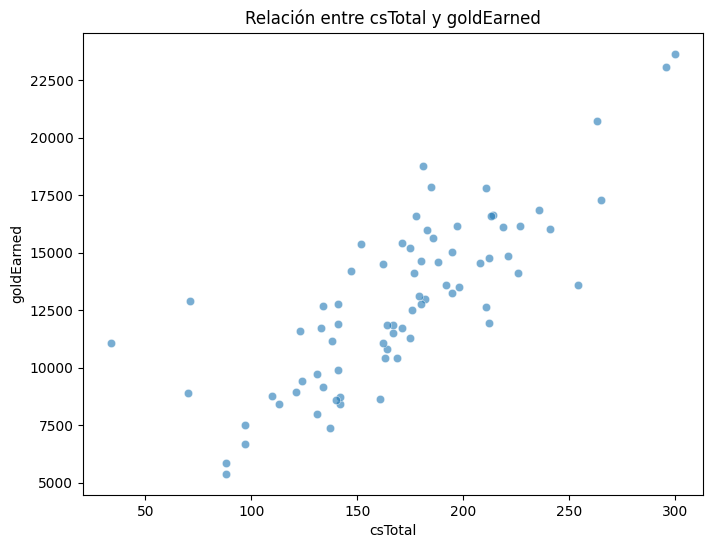

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=dfs["csTotal"], y=dfs["goldEarned"], alpha=0.6)

plt.title("Relación entre csTotal y goldEarned")
plt.xlabel("csTotal")
plt.ylabel("goldEarned")

plt.show()


##Histograma de CS

<Axes: >

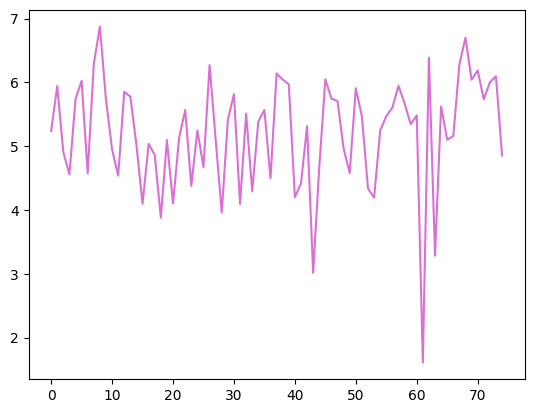

In [ ]:
dfs["csPerMinute"].plot.line(color="orchid")

Aquí se observa más directamente dicha relación.

In [ ]:
print(dfs["csPerMinute"].describe())  # Resumen estadístico
print(dfs["csPerMinute"].tolist())  # Lista de valores

count    75.000000
mean      5.207454
std       0.889359
min       1.608833
25%       4.623045
50%       5.346774
75%       5.834004
max       6.877256
Name: csPerMinute, dtype: float64
[5.236768802228412, 5.943502824858757, 4.907865168539326, 4.558369363804817, 5.740072202166066, 6.024096385542168, 4.577553593947036, 6.289424860853432, 6.877256317689532, 5.727986050566695, 4.9507389162561575, 4.539473684210527, 5.853029651912334, 5.776805251641139, 5.017717930545713, 4.09588327253778, 5.035714285714286, 4.864864864864865, 3.878691141260974, 5.095890410958904, 4.102359056377449, 5.131578947368421, 5.567398119122258, 4.37739989029073, 5.248291571753986, 4.670947030497593, 6.271393643031785, 5.106382978723404, 3.9592081583683263, 5.414160111059695, 5.814977973568283, 4.094010614101592, 5.511551155115511, 4.291764705882353, 5.388349514563107, 5.568627450980392, 4.496644295302013, 6.139670223084384, 6.046153846153846, 5.96931659693166, 4.2, 4.4154488517745305, 5.312631137221989, 3.01398239

Se pueden observar que se tiene una media de 5,2 cs por minuto en las partidas, que los datos no están tan dispersos por lo que son confiables.
Se observa que la partida con un menor valor de CS es la número 63.

In [ ]:
dfs.iloc[63]
#obtener una partida en específico para analizar el pico más bajo de la gráfica de cs

,63
match_id,LA1_1602590534
game_duration,21.63
champion,Chogath
role,SOLO
lane,TOP
kills,4
deaths,13
assists,11
goldEarned,12887
totalDamageDealt,82897


##Valores atípicos

##Caja y bigotes CS

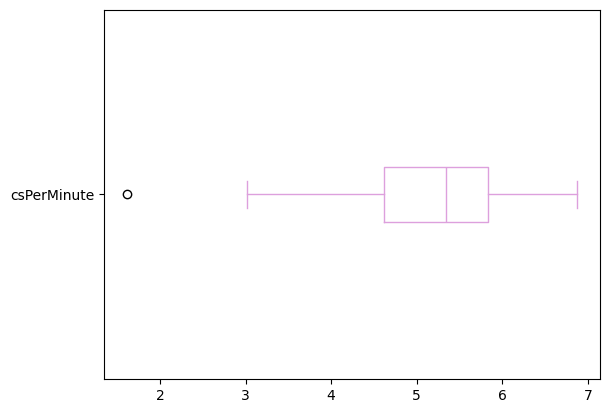

In [ ]:
import matplotlib.pyplot as plt
dfs["csPerMinute"].plot.box(color="plum", vert=False)
plt.show()

Se observa q los datos no están casi dispersos y un único valor atípico, que corresponde a la partida que se encuentra abajo

In [ ]:
outlier_index = dfs["csPerMinute"].idxmin()
print(dfs.loc[outlier_index])

match_id                                                   LA1_1602632778
game_duration                                                       21.13
champion                                                           Gragas
role                                                              SUPPORT
lane                                                                  TOP
kills                                                                   1
deaths                                                                 12
assists                                                                 8
goldEarned                                                          11068
totalDamageDealt                                              -2147483648
csPerMinute                                                      1.608833
csTotal                                                                34
gameReset                                                           False
win                                   

Partida numero 61

In [ ]:
dfs.iloc[61]

,61
match_id,LA1_1602632778
game_duration,21.13
champion,Gragas
role,SUPPORT
lane,TOP
kills,1
deaths,12
assists,8
goldEarned,11068
totalDamageDealt,-2147483648


##Histograma de Oro

<Axes: >

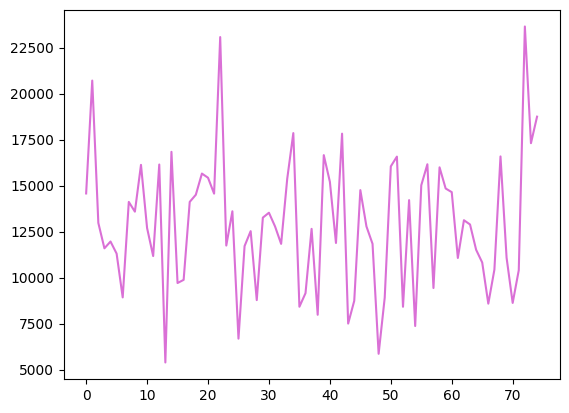

In [ ]:
dfs["goldEarned"].plot.line(color="orchid")

##Caja y bigotes Oro

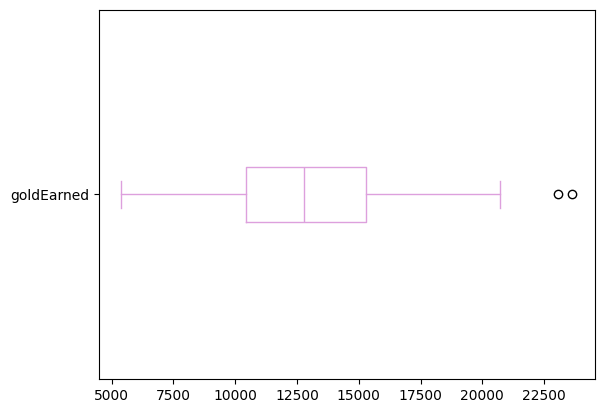

In [ ]:
dfs["goldEarned"].plot.box(color="plum", vert=False)
plt.show()

In [ ]:
print(dfs["goldEarned"].describe())  # Resumen estadístico
print(dfs["goldEarned"].tolist())  # Lista de valores

count       75.000000
mean     12911.173333
std       3676.660670
min       5391.000000
25%      10419.000000
50%      12783.000000
75%      15286.500000
max      23642.000000
Name: goldEarned, dtype: float64
[14572, 20703, 12972, 11592, 11961, 11305, 8926, 14113, 13584, 16125, 12697, 11173, 16144, 5391, 16833, 9707, 9879, 14114, 14502, 15652, 15426, 14562, 23067, 11743, 13604, 6685, 11714, 12525, 8779, 13259, 13526, 12782, 11833, 15369, 17851, 8418, 9155, 12649, 7982, 16653, 15204, 11882, 17820, 7505, 8742, 14754, 12783, 11836, 5862, 8911, 16044, 16573, 8417, 14210, 7371, 15017, 16157, 9436, 15990, 14842, 14643, 11068, 13118, 12887, 11514, 10822, 8587, 10434, 16584, 11080, 8626, 10404, 23642, 17303, 18743]


In [ ]:
dfs.iloc[13]
#obtener una partida en específico para analizar el pico más bajo de la gráfica de oro

,13
match_id,LA1_1607097488
game_duration,15.23
champion,Tryndamere
role,SUPPORT
lane,NONE
kills,3
deaths,0
assists,1
goldEarned,5391
totalDamageDealt,62512


In [ ]:
dfs.iloc[22]
#obtener una partida en específico para analizar el pico más alto de la gráfica de oro

,22
match_id,LA1_1606648968
game_duration,53.17
champion,Sett
role,DUO
lane,MIDDLE
kills,20
deaths,10
assists,12
goldEarned,23067
totalDamageDealt,398472


##Campeones Analizados

In [ ]:
most_played_champions = dfs["champion"].value_counts()
print(most_played_champions)

champion
MonkeyKing     29
Sion           10
Sett            5
Shen            5
Volibear        5
Malphite        4
Mordekaiser     3
Gragas          2
Ornn            2
Ryze            2
Gwen            1
Darius          1
Renekton        1
Tryndamere      1
Camille         1
DrMundo         1
Sylas           1
Chogath         1
Name: count, dtype: int64


Teniendo en cuenta eso, se van a tomar como punto de refencia los champions: MonkeyKing, Sion, Sett, Shen y Volibear

In [ ]:
champion_name = "MonkeyKing"

champion_games = dfs[dfs["champion"] == champion_name]

# Calcular tasa de victoria (True cuenta como 1, False como 0)
win_rate = champion_games["win"].mean() * 100

print(f"Tasa de victoria de {champion_name}: {win_rate:.2f}%")

Tasa de victoria de MonkeyKing: 55.17%


Nos muestra q en promedio gana el 55.17% de las veces que juega con MonkyKing

In [ ]:
champion_name = "Sion"

champion_games = dfs[dfs["champion"] == champion_name]

# Calcular tasa de victoria (True cuenta como 1, False como 0)
win_rate = champion_games["win"].mean() * 100

print(f"Tasa de victoria de {champion_name}: {win_rate:.2f}%")

Tasa de victoria de Sion: 60.00%


Nos muestra q en promedio gana el 60% de las veces que juega con Sion

In [ ]:
champion_name = "Sett"

champion_games = dfs[dfs["champion"] == champion_name]

# Calcular tasa de victoria (True cuenta como 1, False como 0)
win_rate = champion_games["win"].mean() * 100

print(f"Tasa de victoria de {champion_name}: {win_rate:.2f}%")

Tasa de victoria de Sett: 80.00%


Nos muestra q en promedio gana el 80% de las veces que juega con Sett

In [ ]:
champion_name = "Shen"

champion_games = dfs[dfs["champion"] == champion_name]

# Calcular tasa de victoria (True cuenta como 1, False como 0)
win_rate = champion_games["win"].mean() * 100

print(f"Tasa de victoria de {champion_name}: {win_rate:.2f}%")

Tasa de victoria de Shen: 40.00%


Nos muestra q en promedio gana el 40% de las veces que juega con Shen

In [ ]:
champion_name = "Volibear"  # Reemplázalo por el campeón que quieras analizar

# Filtrar las partidas del campeón
champion_games = dfs[dfs["champion"] == champion_name]

# Calcular tasa de victoria (True cuenta como 1, False como 0)
win_rate = champion_games["win"].mean() * 100

print(f"Tasa de victoria de {champion_name}: {win_rate:.2f}%")

Tasa de victoria de Volibear: 80.00%


Nos muestra q en promedio gana el 80% de las veces que juega con Volibear

##4.Conclusiones de campeones

Se puede analizar que los campeon con el que tiene mayores probabilidades de ganar es con Volibear y con Sett. Con respecto al que menos tiene victorias, se puede deber a la complejidad del manejo del champion, por tanto se puede recomendar hacer lo posible en mejorar la técnica con el  mismo, o tratar de usar aquellos champions con los que tiene las mayores probabilidades de victoria.

In [ ]:
losses_by_enemy_mk = dfs[(dfs["champion"] == "MonkeyKing") & (dfs["win"] == False)]["enemy_champion"].value_counts()
print(losses_by_enemy_mk)

enemy_champion
Pantheon       2
Teemo          1
Shen           1
Viktor         1
Aatrox         1
Mordekaiser    1
Malphite       1
Darius         1
Ornn           1
Gragas         1
Jax            1
Caitlyn        1
Name: count, dtype: int64


In [ ]:
losses_by_enemy_mk = dfs[(dfs["champion"] == "Sion") & (dfs["win"] == False)]["enemy_champion"].value_counts()
print(losses_by_enemy_mk)

enemy_champion
Poppy    1
Sett     1
Kled     1
Name: count, dtype: int64


In [ ]:
losses_by_enemy_mk = dfs[(dfs["champion"] == "Sett") & (dfs["win"] == False)]["enemy_champion"].value_counts()
print(losses_by_enemy_mk)

enemy_champion
Teemo    1
Name: count, dtype: int64


In [ ]:
losses_by_enemy_mk = dfs[(dfs["champion"] == "Shen") & (dfs["win"] == False)]["enemy_champion"].value_counts()
print(losses_by_enemy_mk)

enemy_champion
Darius    2
Name: count, dtype: int64


In [ ]:
losses_by_enemy_mk = dfs[(dfs["champion"] == "Volibear") & (dfs["win"] == False)]["enemy_champion"].value_counts()
print(losses_by_enemy_mk)

enemy_champion
Sett    1
Name: count, dtype: int64


No es muy relevante el dato del oponente contra el que pierde

##5.Conclusiones finales

**Presentadas el dia 29 de marzo:**

https://www.canva.com/design/DAGjFLvDb7k/Th4Nnws-Zt5exa98fRucPg/edit?utm_content=DAGjFLvDb7k&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

